In [1]:
# Importing our Utilities functions:
from utils import CautDataloaderRegular
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


# Modelling
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import LSTM

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

def RFR_Model_Audio(csv_path,
                     data_dir,
                     feature_type="MFCC",
                     threshold=0.5,
                     train_verbose=True):

    X_y_data = CautDataloaderRegular.get_X_y_TrainTest_Audio(csv_path=csv_path,
                                                             data_dir=data_dir,
                                                             feature_type=feature_type,
                                                             input_length_in_seconds=3,
                                                             class_to_num_dict={"truth": 0, "lie": 1},
                                                             verbose=train_verbose)
    
    X_train, y_train = X_y_data[0].reshape(-1, X_y_data[0].shape[1] * X_y_data[0].shape[2]), X_y_data[1]
    X_test, y_test = X_y_data[2].reshape(-1, X_y_data[2].shape[1] * X_y_data[2].shape[2]), X_y_data[3]

    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    
    # Setup model:
    #fitting and evaluating
    rf = RandomForestClassifier(n_estimators=120)
    
    # fit the model:
    rf.fit(X_train, y_train)
    
     # predict on test data:
    y_pred = rf.predict(X_test)
    
    # get metrics (accuracy, precision, recall)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Precision", precision)
    print("Recall", recall)
    
    # show confusion matrix
    CautDataloaderRegular.plot_confusion_matrix(y_test, y_pred)

# MediaPipe (Sequential only, since LSTM can only do sequences):

data_dir updated to: C:\Work\606Capstone\Video_chunks\audio_features\MFCC_audio_features

Selected csv_path: C:\Work\606Capstone\Video_chunks\CSV\
Processed 100 / 520
  - Audio sample shape & label:
    - X_data: (130, 20)
    - y_data: 0
Processed 200 / 520
  - Audio sample shape & label:
    - X_data: (130, 20)
    - y_data: 0
Processed 300 / 520
  - Audio sample shape & label:
    - X_data: (130, 20)
    - y_data: 1
Processed 400 / 520
  - Audio sample shape & label:
    - X_data: (130, 20)
    - y_data: 0
Processed 500 / 520
  - Audio sample shape & label:
    - X_data: (130, 20)
    - y_data: 1
Processed 100 / 223
  - Audio sample shape & label:
    - X_data: (130, 20)
    - y_data: 1
Processed 200 / 223
  - Audio sample shape & label:
    - X_data: (130, 20)
    - y_data: 1
----------------------------
Gathered data shapes:
X_train.shape: (520, 130, 20)
y_train.shape: (520,)
X_test.shape: (223, 130, 20)
y_test.shape: (223,)
(520, 2600) (520,) (223, 2600) (223,)


<IPython.core.display.Javascript object>

Accuracy: 0.7713004484304933
Precision 0.7815126050420168
Recall 0.788135593220339


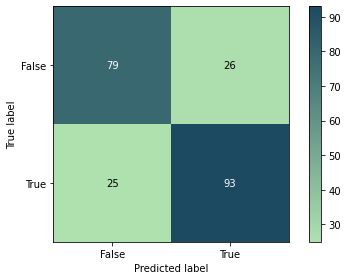

---------------------------------------------------------------

Metrics Rates:
     - True Positive            : 93
     - False Positive           : 26
     - True Negative            : 79
     - False Negative           : 25
     - True Positive Rate       :  0.788135593220339
     - True Negative Rate       :  0.7523809523809524
     - Positive Predictive Value:  0.7815126050420168
     - Negative predictive value:  0.7596153846153846
     - False Positive Rate      :  0.24761904761904763
     - False Negative Rate      :  0.211864406779661
     - False Discovery Rate     :  0.2184873949579832


In [2]:
RFR_Model_Audio(csv_path="C:\\Work\\606Capstone\\Video_chunks\\CSV\\",
                 data_dir="C:\\Work\\606Capstone\\Video_chunks\\audio_features\\",
                 feature_type="MFCC",
                 threshold=0.5,
                 train_verbose=True)